## Analyze A/B Test Results

A/B testing, also known as split testing, refers to a randomized experimentation process wherein two or more versions of a variable (web page, page element, etc.) are shown to different segments of website visitors at the same time to determine which version leaves the maximum impact and drive business metrics.

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these

For this project, an A/B test run by an e-commerce website.  The goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

![ab_test.png](attachment:9caa68d0-84a5-40a6-85cd-abd88565b0a9.png)

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [69]:
# Importing the necessary modules & setting the random seed to (42):
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import pandas as pd

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [40]:
# Reading raw data:
df = pd.read_csv('ab_data.csv', parse_dates=['timestamp'])

In [41]:
# TODO
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [42]:
# TODO
df.shape[0]

294478

c. The number of unique users in the dataset.

In [43]:
# TODO
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [44]:
# TODO
print(f"{(df['converted'].mean() * 100):.2f}%")

11.97%


e. The number of times the `treatment` and `new_page` don't line up.

In [45]:
# TODO
misaligned = df[(df['group'] == 'treatment') ^ (df['landing_page'] == 'new_page')]

In [46]:
# TODO
misaligned.shape[0]

3893

Note that the number of times the `treatment` and `new_page` don't line up is the same as the number of times the `control` and `old_page` don't line up!

f. Do any of the rows have missing values?

In [47]:
# TODO
df.isna().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

Which column have missing values ?

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [48]:
# TODO
condition = (df['group'] == 'treatment') ^ (df['landing_page'] == 'new_page')
df2 = df[~condition] 
df2.shape

(290585, 5)

In [49]:
# TODO
print(df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0])

0


`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [50]:
# TODO
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [51]:
# TODO
duplicates = df2['user_id'].duplicated()
df2[duplicates]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [52]:
# TODO
print(df2[duplicates]['user_id'].values)

[773192]


c. What is the row information for the repeat **user_id**?

In [53]:
# TODO
df2.loc[df['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [54]:
# TODO
df2 = df2.drop(2893)
df2.loc[df['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [55]:
# Defining a function to calculate CR for a given group:
def calculate_cr(data, gp=None):

    """
    Calculates CR for a given group.

    Args:
    (pandas DataFrame) The dataset.
    (str) The group name.

    Returns:
    (float) The conversion rate.
    """

    # Zooming in the required part of the data:
    if gp:
        df_ = data.query("group == @gp").copy()
    else:
        df_ = data.copy()

    # Calculating & returning CR:
    return df_['converted'].mean()

In [58]:
# TODO
print(f"{df2['converted'].mean() * 100:.2f}%")

11.96%


b. Given that an individual was in the `control` group, what is the probability they converted?

In [62]:
# TODO
print(f"{calculate_cr(df2, 'control')*100:.2f}%")

12.04%


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [63]:
# TODO
print(f"{calculate_cr(df2, 'treatment')*100:.2f}%")

11.88%


In [99]:
def annotate(data, **kw):
    """
    This function grasps the current axes and annotates it.

    args:
    (data): pandas DataFrame.

    returns:
    (None)
    """
    n = len(data)
    p = round(data['converted'].mean() * 100, 2)
    ax = plt.gca()
    s = f"N = {n}\nP = {p}%"
    fdict = {'ha': 'center', 'fontsize': 14, 'fontweight': 'bold'}
    ax.text(s=s, x=0.85, y=0.5, transform=ax.transAxes, fontdict=fdict)  # Upper right
    
    ax.set_xticks([0, 1])
    ax.set_xticklabels(labels=['False', 'True'])

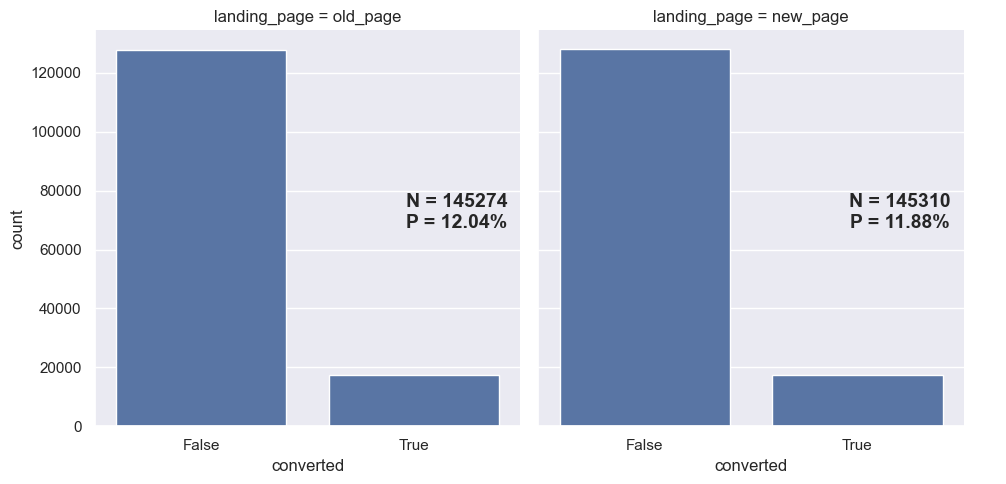

In [100]:
# TODO : Plott CR in different groups:
g = sns.catplot(kind='count', data=df2, x='converted', color='b', col='landing_page')
g.map_dataframe(annotate)
display(g.figure)



What can you say ?

d. What is the probability that an individual received the new page?

In [103]:
# TODO : Crosstabulation:
cont_tab = pd.crosstab(index=df2['group'], columns=df2['converted'],
                       margins=True, margins_name='%' , normalize=True) * 100

cont_tab = np.round(a=cont_tab, decimals=2)
cont_tab

converted,0,1,%
group,,,
control,43.98,6.02,49.99
treatment,44.07,5.94,50.01
%,88.04,11.96,100.00


What can you say about the probability of receiving either pages ?
- There is a nearly identical chance that you will land on either the old_page or the new_page (control vs treatment)

In [113]:
print(f"New Page: {(df2['landing_page'] == 'new_page').mean()*100:.2f}%")
print(f"Old Page: {(df2['landing_page'] == 'old_page').mean()*100:.2f}%")

New Page: 50.01%
Old Page: 49.99%


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

- There is no big diffference between the conversion rates for both groups. However, without using inferential statistical methods we can't tell for sure, we can't quantify our doubt!

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  

`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

##### The null & alternative hypotheses are:</font>
##### 1. **Null hypothesis**: p_new - p_old <= 0, as follows:
$$H_0: P_{new} - P_{old} \leq 0$$

##### 2. **Alternative hypothesis**: p_new - p_old > 0 (one-sided), as follows:
$$H_1: P_{new} - P_{old} > 0$$

##### I have ve represented 3 approaches:</font>
##### 1. Using **bootstrapping**.
##### 2. Using **probability simulation** as suggested in the template.
##### 3. Using **traditional statistical methods**.

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal.

#### <font color='red'>First</font>: **Using confidence intervals & hypothesis testing by bootstrapping.**

##### 1. Calculating the statistic of interest (the available evidence based on the data):

In [118]:
#TODO
p_old = df2[df2['landing_page'] == 'old_page']['converted'].mean()
p_new = df2[df2['landing_page'] == 'new_page']['converted'].mean()


In [119]:
#TODO
stat = p_new - p_old

##### 2. Building the sampling distribution for dif_in_p using bootstrapping:

In [120]:
# Defining a bootstrapping function:
def btstrp_func(data, n_iter, size=None):

    """
    Builds a sampling distribution for difference in
    means by bootstrapping.

    Args:
    (pandas DataFrame) The dataset.
    (int) Number of iterations.
    (function) A function to calculate the CR.
    (list) An array containing the two group labels.
    (int) The size of the sampling.

    Returns:
    (numpy array) The sampling distribultion for p_old.
    (numpy array) The sampling distribultion for p_new.
    (numpy array) The sampling distribultion for difference in means.
    """

    # Initializing 3 empty arrays to keep track of statistics of interest:
    stat_old_arr = np.empty(n_iter)
    stat_new_arr = np.empty(n_iter)
    diff_arr = np.empty(n_iter)

    # Setting the size of the bootstrapped sample:
    if not size:
        size = data.shape[0]

    # Bootstrapping & calculating statistics of interest:
    for i in range(n_iter):
        btstrp_df = data.sample(n=size, replace=True)

        stat_old = btstrp_df.query("group == 'control'")['converted'].mean()
        stat_old_arr[i] = stat_old

        stat_new = btstrp_df.query("group == 'treatment'")['converted'].mean()
        stat_new_arr[i] = stat_new

        diff_arr[i] = stat_new - stat_old

    # Returning the arrays:
    return stat_old_arr, stat_new_arr, diff_arr

In [121]:
#TODO: Optimizing the dataset before bootstrapping:
df_optimized = df2[['group', 'converted']].copy()
df_optimized['group'] = df_optimized['group'].astype('category')
df_optimized['converted'] = df_optimized['converted'].astype('int16')

In [122]:
%%time
# Runtime ~ 7-15 minutes!
p_old_arr, p_new_arr, diff_in_p_arr = btstrp_func(df_optimized, 10000)

CPU times: total: 5min 33s
Wall time: 5min 45s


##### 3. Calculating the confidence interval (95%):

In [123]:
#TODO
ci_old = np.percentile(p_old_arr, [2.5, 97.5])
ci_new = np.percentile(p_new_arr, [2.5, 97.5])
ci_diff = np.percentile(diff_in_p_arr, [2.5, 97.5])

# Confidence Intervals
print("95% Confidence Interval for Conversion Rate - Old Page:", ci_old)
print("95% Confidence Interval for Conversion Rate - New Page:", ci_new)
print("95% Confidence Interval for Difference in Rates:", ci_diff)

95% Confidence Interval for Conversion Rate - Old Page: [0.11866012 0.12204476]
95% Confidence Interval for Conversion Rate - New Page: [0.11711524 0.12042525]
95% Confidence Interval for Difference in Rates: [-0.00391523  0.00074635]


##### 4. Plotting the sampling distributions for p_old, p_new & diff_in_p (with 95% confidence interval):

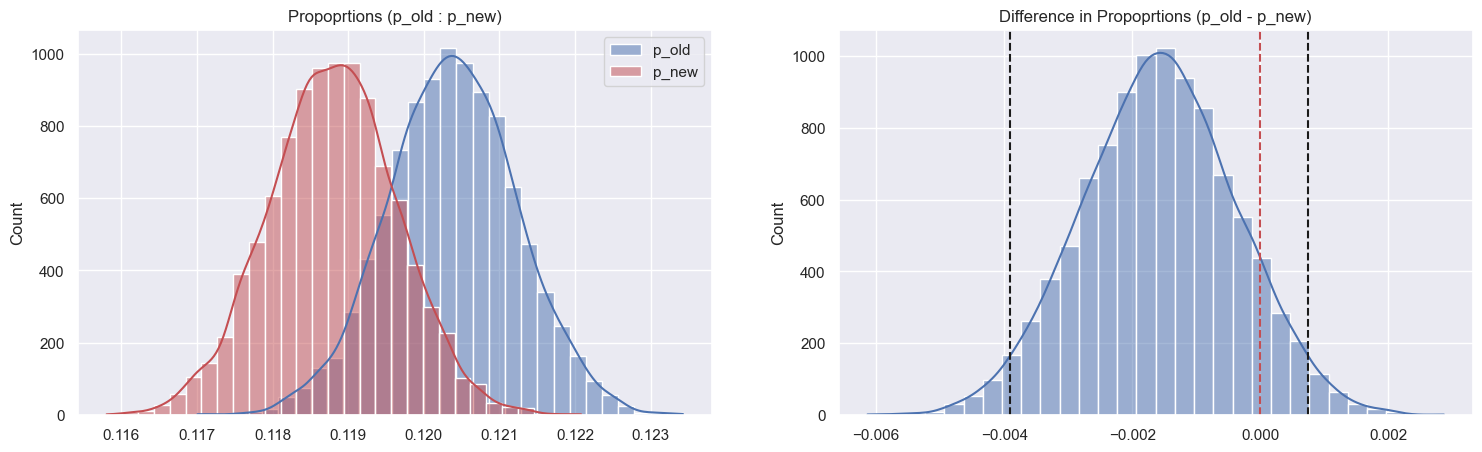

In [ ]:
# Plotting p_old_arr, p_new_arr, diff_in_p_arr:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))`

sns.histplot(x=p_old_arr, bins=30, alpha=0.5, label='p_old', ax=ax1, kde=True)
sns.histplot(x=p_new_arr, bins=30, alpha=0.5, label='p_new', ax=ax1, color='r', kde=True)
ax1.set_title('Propoprtions (p_old : p_new)')
ax1.legend()

sns.histplot(x=diff_in_p_arr, bins=30, ax=ax2, kde=True)
ax2.axvline(x=ci_diff[0], color='k', linestyle='--')
ax2.axvline(x=ci_diff[1], color='k', linestyle='--')
ax2.axvline(x=0, color='r', linestyle='--')
ax2.set_title('Difference in Propoprtions (p_old - p_new)')

display(fig.figure)

##### 5. Formulating hypotheses:
1. Null hypothesis: p_new - p_old <= 0, as follows:
$$H_0: P_{new} - P_{old} \leq 0$$

2. Alternative hypothesis: p_new - p_old > 0 (one-sided), as follows:
$$H_1: P_{new} - P_{old} > 0$$

##### 6. Building the sampling distribution for diff_in_p under the null hypothesis:

In [129]:
## Simulating the null distribution:
rand_gen = np.random.default_rng(42)
null_distribution = rand_gen.normal(0, diff_in_p_arr.std(), 10000)

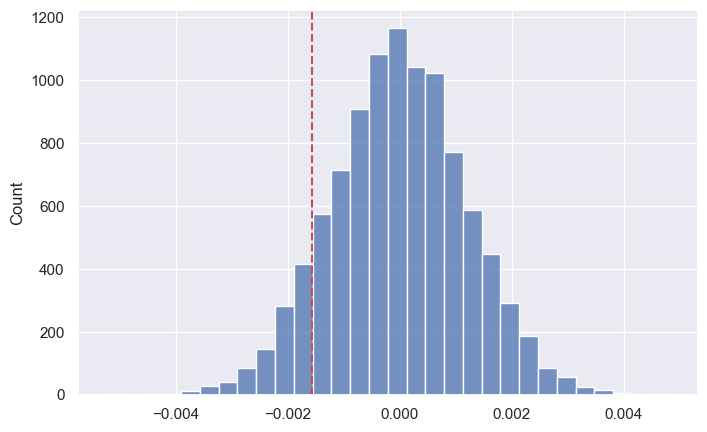

In [130]:
#TODO
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(x=null_distribution, bins=30, ax=ax)
ax.axvline(x=stat, color='r', linestyle='--')
ax2.set_title('Sampling Distribution under the Null Hypothesis ')
display(fig.figure)

##### 7. Calculating p_value:
##### (The probability of observing the available evidence, or more extreme values, under the null hypothesis)

In [134]:
#TODO
p_value = (null_distribution > stat).mean()
p_value

np.float64(0.9007)

##### <font color='red'>Should we reject the null hypothesis?</font>

In [135]:
#TODO
if p_value < 0.05:
    print("Reject the Null Hypothesis.")
else:
    print("Fail to Reject the Null Hypothesis.")

Fail to Reject the Null Hypothesis.


##### To interpret a test statistic value, we use a probability summary of the evidence against the null hypothesis, here’s how we get it:

##### 1. We presume that the null hypothesis is true since the burden of proof is on the alternative.
##### 2. Then we consider the sorts of values we’d expect to get for the test statistic, according to its sampling distribution presuming the null is true.
##### 3. If the test statistic falls well out in a tail of the sampling distribution, it is far from what H0 predicts. If H0 were true, such a value would be unusual.

##### This is called the p-value, it is the probability of obtaining the observed statistic or a "more extreme" value (by extreme we just mean more in favour of the alternate hypothesis mean) if the null hypothesis is true.

Do we reject the null hypothesis ?